In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.precision',3)

In [2]:


df = pd.DataFrame({
    "Likes Popcorn" : [1,1,0,1,0,0],
    "Age": [12, 87, 44, 19, 32, 14],
    "Fav Color": ['B','G','B','R','G','B'],
    "Loves Troll": [1,1,0,0,1,1]
})
df

,Likes Popcorn,Age,Fav Color,Loves Troll
0,1,12,B,1
1,1,87,G,1
2,0,44,B,0
3,1,19,R,0
4,0,32,G,1
5,0,14,B,1


In [4]:
df = pd.get_dummies(df)
df

,Likes Popcorn,Age,Loves Troll,Fav Color_B,Fav Color_G,Fav Color_R
0,1,12,1,True,False,False
1,1,87,1,False,True,False
2,0,44,0,True,False,False
3,1,19,0,False,False,True
4,0,32,1,False,True,False
5,0,14,1,True,False,False


In [10]:
# rerraange
df = df.iloc[:,[0,1,3,4,5,2]]
df = df.copy()

## Step 1

- log of odd

- convert odds to probability

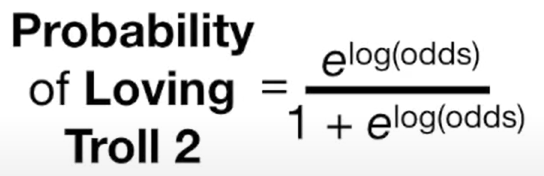

In [11]:
## Step 1a
odds = (df['Loves Troll'] == 1).sum()/(df['Loves Troll'] == 0).sum()
odds = np.log(odds)
P = np.exp(odds)/(1 + np.exp(odds))
P
df['pred1'] = P
df

,Likes Popcorn,Age,Fav Color_G,Fav Color_R,Loves Troll,Fav Color_B,pred1
0,1,12,False,False,1,True,0.667
1,1,87,True,False,1,False,0.667
2,0,44,False,False,0,True,0.667
3,1,19,False,True,0,False,0.667
4,0,32,True,False,1,False,0.667
5,0,14,False,False,1,True,0.667


## Step 2: Calculate residuals

residuals  = observed - prev predictions


In [12]:
df['res1'] = df['Loves Troll'] - df['pred1']
df

,Likes Popcorn,Age,Fav Color_G,Fav Color_R,Loves Troll,Fav Color_B,pred1,res1
0,1,12,False,False,1,True,0.667,0.333
1,1,87,True,False,1,False,0.667,0.333
2,0,44,False,False,0,True,0.667,-0.667
3,1,19,False,True,0,False,0.667,-0.667
4,0,32,True,False,1,False,0.667,0.333
5,0,14,False,False,1,True,0.667,0.333


## Step 3:

Create a tree to predict residuals


In [13]:
x = np.array(df.drop(columns=['pred1', 'Loves Troll', 'res1']))
y = np.array(df['res1'])

[Text(0.6, 0.8333333333333334, 'Fav Color_G <= 0.5\nsquared_error = 0.222\nsamples = 6\nvalue = 0.0'),
 Text(0.4, 0.5, 'Age <= 38.0\nsquared_error = 0.16\nsamples = 5\nvalue = 0.133'),
 Text(0.2, 0.16666666666666666, 'squared_error = 0.0\nsamples = 3\nvalue = 0.333'),
 Text(0.6, 0.16666666666666666, 'squared_error = 0.25\nsamples = 2\nvalue = -0.167'),
 Text(0.8, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = -0.667')]

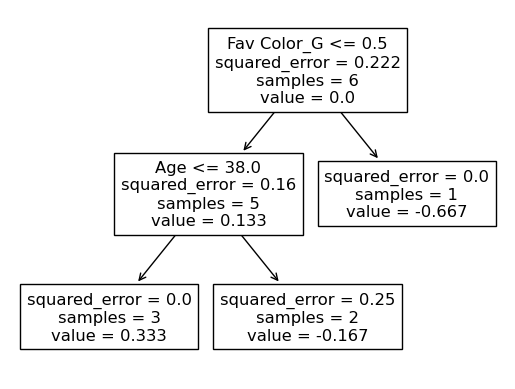

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

t1 = DecisionTreeRegressor(max_depth=2)
t1.fit(x,y)
tree.plot_tree(t1, feature_names=['Likes Popcorn','Age', 'Fav Color_B', 'Fav Color_G', 'Fav Color_R'])

In [15]:
df['pred_t1_odds'] = t1.predict(x)
df

,Likes Popcorn,Age,Fav Color_G,Fav Color_R,Loves Troll,Fav Color_B,pred1,res1,pred_t1_odds
0,1,12,False,False,1,True,0.667,0.333,0.333
1,1,87,True,False,1,False,0.667,0.333,-0.167
2,0,44,False,False,0,True,0.667,-0.667,-0.167
3,1,19,False,True,0,False,0.667,-0.667,-0.667
4,0,32,True,False,1,False,0.667,0.333,0.333
5,0,14,False,False,1,True,0.667,0.333,0.333


[Text(0.6, 0.8333333333333334, 'x[3] <= 0.5\nsquared_error = 0.222\nsamples = 6\nvalue = 0.0'),
 Text(0.4, 0.5, 'x[1] <= 38.0\nsquared_error = 0.16\nsamples = 5\nvalue = 0.133'),
 Text(0.2, 0.16666666666666666, 'squared_error = 0.0\nsamples = 3\nvalue = 0.333'),
 Text(0.6, 0.16666666666666666, 'squared_error = 0.25\nsamples = 2\nvalue = -0.167'),
 Text(0.8, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = -0.667')]

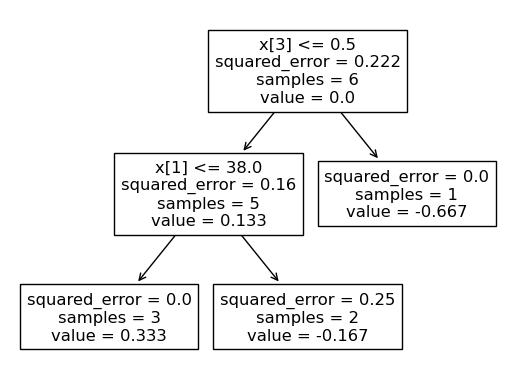

In [17]:
tree.plot_tree(t1)

In [48]:
t